In [147]:
alpha=0.7/10
beta=0.5/100
delta=0.2/100
gamma=0.3/10
def get_dXY_dt(X,Y):
    dX_dt = alpha*X - beta*X*Y 
    dY_dt= delta*X*Y - gamma*Y
    return dX_dt,dY_dt

import numpy as np
import matplotlib.pyplot as plt

X=10
Y=5
dt=0.1
xL=[]
yL=[]
tL=[]
for i in range(3000):
    if i%10==0:
        xL.append(X)
        yL.append(Y)
        tL.append(i*dt)
    dX_dt,dY_dt=get_dXY_dt(X,Y)
    X+=dX_dt*dt
    Y+=dY_dt*dt
    

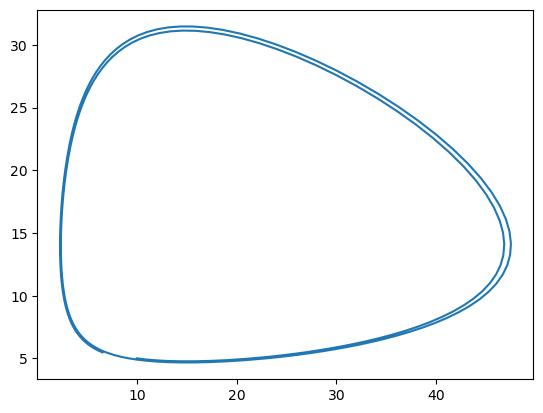

In [108]:
plt.plot(xL,yL)

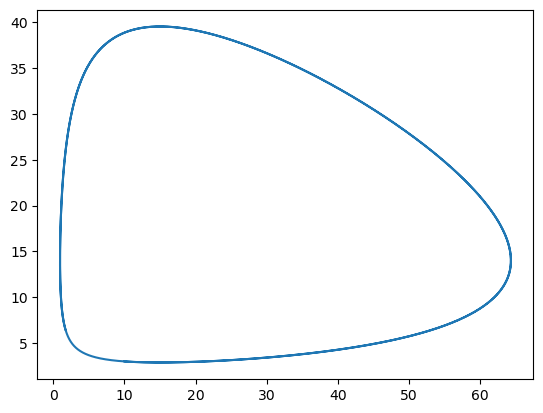

In [113]:
# solve the system using odeint
from scipy.integrate import odeint
def model(z,t):
    X=z[0]
    Y=z[1]
    dX_dt,dY_dt=get_dXY_dt(X,Y)
    return [dX_dt,dY_dt]
z0=[10,3]
t = np.linspace(0,300,3000)
z = odeint(model,z0,t)
x=z[:,0]
y=z[:,1]
#plt.plot(t,x,'r-',label='X(t)')
#plt.plot(t,y,'b-',label='Y(t)')
plt.plot(x,y)

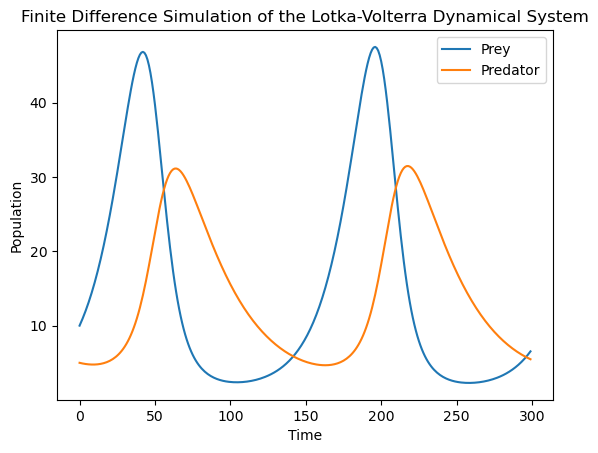

In [148]:
plt.plot(tL,xL,label='Prey')
plt.plot(tL,yL,label='Predator')
plt.legend()
plt.title('Finite Difference Simulation of the Lotka-Volterra Dynamical System')
plt.xlabel('Time')
plt.ylabel('Population')
plt.savefig('Lotka-Volterra.png')

In [151]:
scalef=20
alpha=0.7/10
beta=0.5/100
delta=0.2/100
gamma=0.3/10
def get_tau_and_transition(X,Y,alpha,beta,gamma):
    tot_prop=alpha*X/scalef+beta*X*Y/scalef**2+gamma*Y/scalef
    r=np.random.rand()
    tau=-np.log(r)/tot_prop
    r=np.random.rand()
    if r<alpha*X/scalef/tot_prop:
        return 1,tau
    elif r<(alpha*X/scalef+beta*X*Y/scalef**2)/tot_prop:
        return 2,tau
    else:
        return 3,tau
    
def update_state(X,Y,alpha,beta,gamma,delta):
    r,tau=get_tau_and_transition(X,Y,alpha,beta,gamma)
    if r==1:
        return max(2,X+1),max(2,Y),tau
    elif r==2:
        return max(2,X-1),Y+1*delta/beta,tau
    else:
        return X,max(2,Y-1),tau

In [152]:
#simulate the system
X=10*scalef
Y=5*scalef
xL=[]
yL=[]
tL=[]
t=0
i=0
while t<300*scalef:
    if i%100==0:
        xL.append(X/scalef)
        yL.append(Y/scalef)
        tL.append(t/scalef)
    X,Y,tau=update_state(X,Y,alpha,beta,gamma,delta)
    #print(X,Y,tau)
    t+=tau
    i+=1

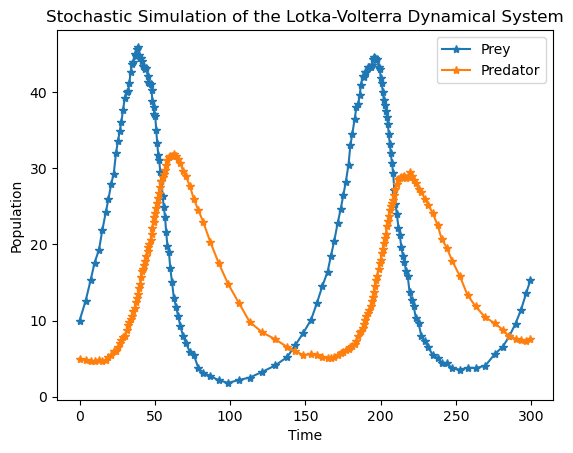

In [154]:
plt.plot(tL,xL,label='Prey',marker='*')
plt.plot(tL,yL,label='Predator',marker='*')
plt.legend()
plt.title('Stochastic Simulation of the Lotka-Volterra Dynamical System')
plt.xlabel('Time')
plt.ylabel('Population')
plt.savefig('Lotka-Volterra_SSA.png')
#plt.plot(xL,yL)

In [137]:
print(tL)

[]


In [17]:
print(np.random.rand())

0.9412651207971073
